In [1]:
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

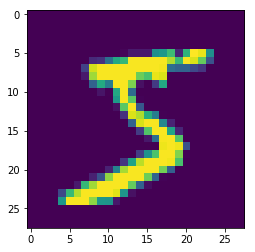

label: 5


In [3]:
plt.imshow(x_train[0])
plt.show()
print("label:", y_train[0])

In [4]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
x_train = x_train.reshape((x_train.shape[0], -1))
# y_train = y_train.reshape((y_train.shape[0], -1))  NO NEED TO RESHAPE Y OTHERWISE OUTPUT OF ONE-HOT ENCODING WILL BE WRONG
x_test = x_test.reshape((x_test.shape[0], -1))
# y_test = y_test.reshape((y_test.shape[0], -1))

In [7]:
print(x_train.shape, y_train.shape)

(60000, 784) (60000,)


In [8]:
# print(y_train.shape)

In [7]:
# x_train, _ , y_train, _ = train_test_split(x_train, y_train, test_size = 0.67, random_state = 7)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(y_train.shape)

(60000, 10)


In [8]:
from keras.layers import Dense
from keras import optimizers

In [11]:
model = Sequential()

In [12]:
model.add(Dense(50, input_shape=(784, ), activation = "sigmoid"))
model.add(Dense(50, activation = "sigmoid"))
model.add(Dense(50, activation = "sigmoid"))
model.add(Dense(50, activation = "sigmoid"))
model.add(Dense(10, activation = "softmax"))

Instructions for updating:
Colocations handled automatically by placer.


In [13]:
sgd = optimizers.SGD(lr = 0.001)
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])  #categorical_crossentropy when the output labels in one-hot encoding format
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_4 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                510       
Total params: 47,410
Trainable params: 47,410
Non-trainable params: 0
_________________________________________________________________


In [14]:
history = model.fit(x_train, y_train, batch_size = 256, validation_split = 0.3, epochs = 100, verbose = 1)
# history = model.fit(X_train, y_train, batch_size = 256, validation_split = 0.3, epochs = 100, verbose = 0)

Instructions for updating:
Use tf.cast instead.
Train on 42000 samples, validate on 18000 samples
Epoch 1/100
42000/42000 [==============================] - 10s 229us/step - loss: 2.4733 - acc: 0.0976 - val_loss: 2.4492 - val_acc: 0.0968
Epoch 2/100
42000/42000 [==============================] - 8s 181us/step - loss: 2.4157 - acc: 0.0976 - val_loss: 2.4015 - val_acc: 0.0968
Epoch 3/100
42000/42000 [==============================] - 6s 154us/step - loss: 2.3775 - acc: 0.0976 - val_loss: 2.3694 - val_acc: 0.0968
Epoch 4/100
42000/42000 [==============================] - 4s 89us/step - loss: 2.3519 - acc: 0.0976 - val_loss: 2.3474 - val_acc: 0.0968
Epoch 5/100
42000/42000 [==============================] - 9s 210us/step - loss: 2.3345 - acc: 0.0976 - val_loss: 2.3327 - val_acc: 0.0971
Epoch 6/100
42000/42000 [==============================] - 4s 98us/step - loss: 2.3231 - acc: 0.1011 - val_loss: 2.3225 - val_acc: 0.1197
Epoch 7/100
42000/42000 [==============================] - 6s 140us/s

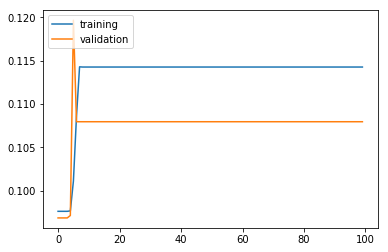

In [15]:
# model.fit returns A History object. Its History.history attribute is a record of training loss values and metrics values at successive epochs, as well as validation loss values and validation metrics values (if applicable).
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

In [16]:
results = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 94us/step


In [17]:
print(results[1])

0.1135


# Improving model by initializing weights

In [18]:
def mlp_model():
    model = Sequential()
# initializer sets a way for setting initial random weights
#     model.add(Dense(50, input_shape = (784, ), kernel_initializer='he_normal'))
    model.add(Dense(50, input_shape=(784, ), kernel_initializer='he_normal', activation = 'sigmoid'))
    model.add(Dense(50, kernel_initializer='he_normal', activation = 'sigmoid'))
    model.add(Dense(50, kernel_initializer='he_normal', activation = 'sigmoid'))
    model.add(Dense(50, kernel_initializer='he_normal', activation = 'sigmoid'))
    model.add(Dense(10, kernel_initializer='he_normal', activation = 'softmax'))
    sgd = optimizers.SGD(lr=.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['acc'])
    return model

In [19]:
model = mlp_model()
print(model)
# history = model.fit(x_train, y_train, validation_split=0.3, epochs = 100, verbose = 1)

In [20]:
history = model.fit(x_train, y_train, validation_split=0.3, epochs = 100, verbose = 1)

Train on 42000 samples, validate on 18000 samples
Epoch 1/100
42000/42000 [==============================] - 10s 231us/step - loss: 2.3618 - acc: 0.1095 - val_loss: 2.3020 - val_acc: 0.1079
Epoch 2/100
42000/42000 [==============================] - 11s 266us/step - loss: 2.2948 - acc: 0.1143 - val_loss: 2.2928 - val_acc: 0.1079
Epoch 3/100
42000/42000 [==============================] - 13s 305us/step - loss: 2.2895 - acc: 0.1149 - val_loss: 2.2884 - val_acc: 0.1101
Epoch 4/100
42000/42000 [==============================] - 9s 221us/step - loss: 2.2855 - acc: 0.1213 - val_loss: 2.2846 - val_acc: 0.1248
Epoch 5/100
42000/42000 [==============================] - 9s 212us/step - loss: 2.2816 - acc: 0.1311 - val_loss: 2.2808 - val_acc: 0.1595
Epoch 6/100
42000/42000 [==============================] - 18s 435us/step - loss: 2.2778 - acc: 0.1590 - val_loss: 2.2769 - val_acc: 0.1566
Epoch 7/100
42000/42000 [==============================] - 18s 433us/step - loss: 2.2739 - acc: 0.1682 - val_los

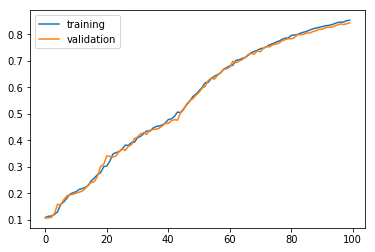

In [23]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [26]:
results = model.evaluate(x_test, y_test)
print('test_accuracy:', results[1]*100, '%')

10000/10000 [==============================] - 1s 65us/step
test_accuracy: 84.83000000000001 %


# Optimizing by experimenting with Activation function

In [39]:
def mlp_model():
    model = Sequential()
    model.add(Dense(50, input_shape=(784, ), activation = 'relu'))
    model.add(Dense(50, activation = 'relu'))
    model.add(Dense(50, activation = 'relu'))
    model.add(Dense(50, activation = 'relu'))
    model.add(Dense(10, activation = 'softmax'))
    sgd = optimizers.SGD(lr=0.001)
    model.compile(metrics = ['acc'], optimizer = sgd, loss = 'categorical_crossentropy')
    return model

In [41]:
model = mlp_model()
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 50)                39250     
_________________________________________________________________
dense_27 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_28 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_29 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_30 (Dense)             (None, 10)                510       
Total params: 47,410
Trainable params: 47,410
Non-trainable params: 0
_________________________________________________________________
None


In [42]:
history = model.fit(x_train, y_train, epochs = 100, verbose=0, validation_split = 0.3)

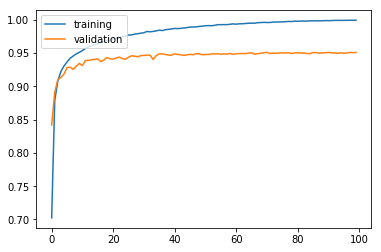

0.9992142857142857


In [43]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()
print(history.history['acc'][99])

In [45]:
results = model.evaluate(x_test, y_test)
print("Test accuracy:", results[1])

10000/10000 [==============================] - 1s 99us/step
Test accuracy: 0.9535


Some theory about batch normalization:
   1) We need normalization on input data so as to prevent shifting of parameters and preferring data which is more in value
For Ex:- if we have dataset with age ranging from 0 to 100 and some other feature having values in the range of 100 to 100000 then the nn will go through exploding gradient descent and answer will become more dependent on the values having greater values. As a result, getting a good result from such nn will take more time. So, to solve this problem normalization is used.
   2) So since this works on input layer, we can do the same for hidden layers also. Sometimes, weights were some neuron in output layer may become high and this will result in higher values in some nearons and smaller values in other neurons. So in batch normalization we normalize the values obtained from activation function and obtain two parameters.
   3) z = (x-m)/s -> normalization of activated values
      Multiply normalized value with arbitrary variable and add the result to another arbitrary variable
      z*g + b
      these two parameters are learned while training on a dataset so as to reduce internal covariance shift. This result to less minimas and thus speed up the learning process.

# Using Optimizer


In [54]:
def mlp_model():
    model = Sequential()
    model.add(Dense(50, input_shape=(784, ), activation = 'relu'))
    model.add(Dense(50, activation = 'relu'))
    model.add(Dense(50, activation = 'relu'))
    model.add(Dense(50, activation = 'relu'))
    model.add(Dense(10, activation = 'softmax'))
    adam = optimizers.Adam(lr=0.001)
    model.compile(metrics = ['acc'], optimizer = adam, loss = 'categorical_crossentropy')
    return model

In [55]:
model = mlp_model()
history = model.fit(x_train, y_train, verbose = 2, epochs = 100, validation_split = 0.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/100
 - 13s - loss: 3.4757 - acc: 0.7185 - val_loss: 0.4228 - val_acc: 0.8892
Epoch 2/100
 - 11s - loss: 0.3277 - acc: 0.9109 - val_loss: 0.2976 - val_acc: 0.9150
Epoch 3/100
 - 11s - loss: 0.2397 - acc: 0.9327 - val_loss: 0.2449 - val_acc: 0.9340
Epoch 4/100
 - 10s - loss: 0.2020 - acc: 0.9435 - val_loss: 0.2187 - val_acc: 0.9399
Epoch 5/100
 - 10s - loss: 0.1759 - acc: 0.9497 - val_loss: 0.1975 - val_acc: 0.9466
Epoch 6/100
 - 10s - loss: 0.1595 - acc: 0.9552 - val_loss: 0.2036 - val_acc: 0.9458
Epoch 7/100
 - 10s - loss: 0.1384 - acc: 0.9601 - val_loss: 0.1712 - val_acc: 0.9538
Epoch 8/100
 - 11s - loss: 0.1262 - acc: 0.9639 - val_loss: 0.2091 - val_acc: 0.9432
Epoch 9/100
 - 10s - loss: 0.1124 - acc: 0.9683 - val_loss: 0.1646 - val_acc: 0.9569
Epoch 10/100
 - 9s - loss: 0.1105 - acc: 0.9684 - val_loss: 0.1647 - val_acc: 0.9561
Epoch 11/100
 - 9s - loss: 0.0949 - acc: 0.9734 - val_loss: 0.1717 - val_acc: 0.9584
Epoch 12/100
 -

Epoch 97/100
 - 10s - loss: 0.0403 - acc: 0.9929 - val_loss: 0.3232 - val_acc: 0.9624
Epoch 98/100
 - 10s - loss: 0.0288 - acc: 0.9944 - val_loss: 0.2810 - val_acc: 0.9658
Epoch 99/100
 - 9s - loss: 0.0229 - acc: 0.9951 - val_loss: 0.3819 - val_acc: 0.9567
Epoch 100/100
 - 10s - loss: 0.0257 - acc: 0.9944 - val_loss: 0.3098 - val_acc: 0.9645


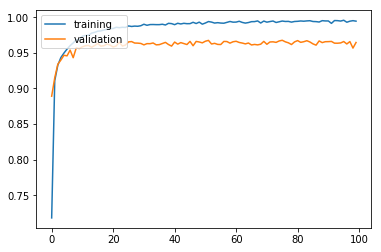

In [56]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [57]:
results = model.evaluate(x_test, y_test)
print(results[1])

10000/10000 [==============================] - 1s 69us/step
0.968


# Batch Normalization


In [9]:
from keras.layers import Activation, BatchNormalization

In [16]:
def mlp_model():
    model = Sequential()
    model.add(Dense(50, input_shape = (784, )))
    model.add(BatchNormalization())
    model.add(Activation('sigmoid'))
    model.add(Dense(50))
    model.add(BatchNormalization())
    model.add(Activation('sigmoid'))
    model.add(Dense(50))
    model.add(BatchNormalization())
    model.add(Activation('sigmoid'))
    model.add(Dense(50))
    model.add(BatchNormalization())
    model.add(Activation('sigmoid'))
    model.add(Dense(10))
    model.add(BatchNormalization())
    model.add(Activation('softmax'))
    adam = optimizers.Adam(lr=.001)
    model.compile(loss = 'categorical_crossentropy', metrics=['acc'], optimizer=adam)
    return model


In [19]:
model = mlp_model()
history = model.fit(x_train, y_train, epochs = 20, verbose = 2, validation_split = 0.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/20
 - 29s - loss: 0.6263 - acc: 0.8583 - val_loss: 0.3503 - val_acc: 0.9246
Epoch 2/20
 - 25s - loss: 0.3632 - acc: 0.9071 - val_loss: 0.2521 - val_acc: 0.9399
Epoch 3/20
 - 27s - loss: 0.2798 - acc: 0.9243 - val_loss: 0.2077 - val_acc: 0.9433
Epoch 4/20
 - 27s - loss: 0.2295 - acc: 0.9383 - val_loss: 0.1727 - val_acc: 0.9550
Epoch 5/20
 - 25s - loss: 0.1964 - acc: 0.9469 - val_loss: 0.1613 - val_acc: 0.9549
Epoch 6/20
 - 25s - loss: 0.1707 - acc: 0.9524 - val_loss: 0.1403 - val_acc: 0.9605
Epoch 7/20
 - 25s - loss: 0.1548 - acc: 0.9568 - val_loss: 0.1307 - val_acc: 0.9625
Epoch 8/20
 - 25s - loss: 0.1377 - acc: 0.9608 - val_loss: 0.1241 - val_acc: 0.9632
Epoch 9/20
 - 25s - loss: 0.1269 - acc: 0.9640 - val_loss: 0.1276 - val_acc: 0.9632
Epoch 10/20
 - 28s - loss: 0.1199 - acc: 0.9661 - val_loss: 0.1174 - val_acc: 0.9653
Epoch 11/20
 - 25s - loss: 0.1098 - acc: 0.9679 - val_loss: 0.1198 - val_acc: 0.9668
Epoch 12/20
 - 25s - los

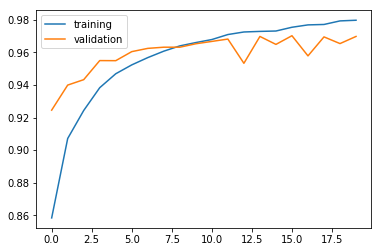

In [20]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [22]:
result = model.evaluate(x_test, y_test)
print(result[1])

10000/10000 [==============================] - 2s 171us/step
0.9729


# Dropout (Regularization)

Some theory about dropout:-
Dropout chooses a set of neurons to be trained during a particular forward and backward prop with probability p of whether a neuron will be selected or not. 
Why dropout:-
A fully connected layer occupies most of the parameters, and hence, neurons develop co-dependency amongst each other during training which curbs the individual power of each neuron leading to over-fitting of training data.


In [23]:
from keras.layers import Dropout

In [29]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('sigmoid'))    
    model.add(Dropout(0.2))                        # Dropout layer after Activation
    model.add(Dense(50))
    model.add(Activation('sigmoid'))
    model.add(Dropout(0.2))                        # Dropout layer after Activation
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dropout(0.2))                        # Dropout layer after Activation
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dropout(0.2))                         # Dropout layer after Activation
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [31]:
model = mlp_model()
history = model.fit(x_train, y_train, validation_split = 0.3, epochs = 20, verbose = 2)

Train on 42000 samples, validate on 18000 samples
Epoch 1/20
 - 16s - loss: 1.5968 - acc: 0.4009 - val_loss: 0.9080 - val_acc: 0.7134
Epoch 2/20
 - 14s - loss: 1.0226 - acc: 0.6441 - val_loss: 0.7393 - val_acc: 0.7715
Epoch 3/20
 - 15s - loss: 0.9112 - acc: 0.6913 - val_loss: 0.6727 - val_acc: 0.7817
Epoch 4/20
 - 15s - loss: 0.8255 - acc: 0.7276 - val_loss: 0.5897 - val_acc: 0.8201
Epoch 5/20
 - 19s - loss: 0.7518 - acc: 0.7589 - val_loss: 0.5416 - val_acc: 0.8376
Epoch 6/20
 - 14s - loss: 0.7094 - acc: 0.7768 - val_loss: 0.4955 - val_acc: 0.8512
Epoch 7/20
 - 16s - loss: 0.6696 - acc: 0.7940 - val_loss: 0.4826 - val_acc: 0.8558
Epoch 8/20
 - 14s - loss: 0.6506 - acc: 0.8014 - val_loss: 0.4279 - val_acc: 0.8788
Epoch 9/20
 - 14s - loss: 0.6177 - acc: 0.8167 - val_loss: 0.4194 - val_acc: 0.8785
Epoch 10/20
 - 14s - loss: 0.5934 - acc: 0.8223 - val_loss: 0.4135 - val_acc: 0.8768
Epoch 11/20
 - 14s - loss: 0.5821 - acc: 0.8269 - val_loss: 0.4043 - val_acc: 0.8812
Epoch 12/20
 - 14s - los

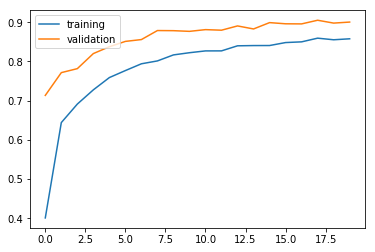

In [32]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [35]:
result = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 132us/step


In [36]:
print(result[1])

0.9067


# Model Ensemble


In [37]:
import numpy as np
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

C:\Users\gunja\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [40]:
y_train = np.argmax(y_train, axis=1)
# y_test = np.argmax(y_test, axis = 1)

AxisError: axis 1 is out of bounds for array of dimension 1

In [41]:
print(y_train)

[5 0 4 ... 5 6 8]


In [42]:
y_test = np.argmax(y_test, axis=1)

In [43]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [45]:
model1 = KerasClassifier(build_fn=mlp_model, epochs = 20, verbose = 2, validation_split = 0.3)
model2 = KerasClassifier(build_fn=mlp_model, epochs = 20, verbose = 2, validation_split = 0.3)
model3 = KerasClassifier(build_fn=mlp_model, epochs = 20, verbose = 2, validation_split = 0.3)

In [46]:
ensemble_clf = VotingClassifier(estimators=[('model1', model1), ('model2', model2), ('model3', model3)], voting = 'soft')

In [ ]:
ensemble_clf.fit(x_train, y_train)

Train on 42000 samples, validate on 18000 samples
Epoch 1/20
 - 18s - loss: 1.2781 - acc: 0.5862 - val_loss: 0.8358 - val_acc: 0.7402
Epoch 2/20
 - 13s - loss: 0.6833 - acc: 0.7934 - val_loss: 0.5994 - val_acc: 0.8147
Epoch 3/20
 - 13s - loss: 0.5545 - acc: 0.8333 - val_loss: 0.5017 - val_acc: 0.8487
Epoch 4/20
 - 15s - loss: 0.5055 - acc: 0.8481 - val_loss: 0.4521 - val_acc: 0.8627
Epoch 5/20
 - 16s - loss: 0.4916 - acc: 0.8513 - val_loss: 0.4392 - val_acc: 0.8649
Epoch 6/20
 - 14s - loss: 0.4367 - acc: 0.8693 - val_loss: 0.3855 - val_acc: 0.8830
Epoch 7/20
 - 14s - loss: 0.4296 - acc: 0.8687 - val_loss: 0.4032 - val_acc: 0.8777
Epoch 8/20
 - 15s - loss: 0.4037 - acc: 0.8782 - val_loss: 0.3757 - val_acc: 0.8867
Epoch 9/20
 - 16s - loss: 0.3878 - acc: 0.8811 - val_loss: 0.3987 - val_acc: 0.8737
Epoch 10/20
 - 13s - loss: 0.3776 - acc: 0.8817 - val_loss: 0.3389 - val_acc: 0.8974
Epoch 11/20
 - 14s - loss: 0.3500 - acc: 0.8933 - val_loss: 0.3496 - val_acc: 0.8936
Epoch 12/20
 - 14s - los